In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

In [2]:
df = pd.read_csv("stroke_risk_dataset.csv")  # Replace with your file name
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [3]:
print(df.info())
print(df.describe(include="all"))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

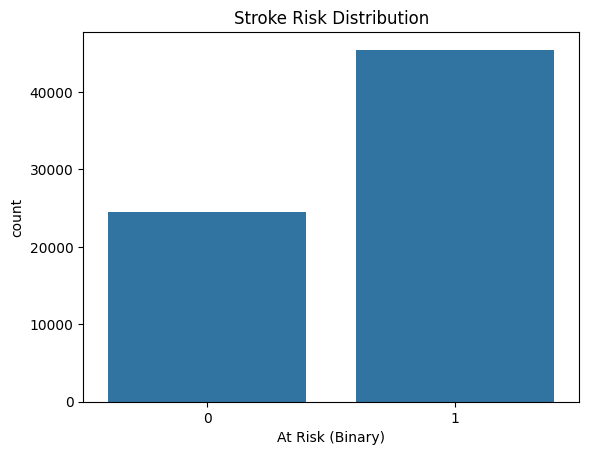

In [4]:
sns.countplot(x="At Risk (Binary)", data=df)
plt.title("Stroke Risk Distribution")
plt.show()

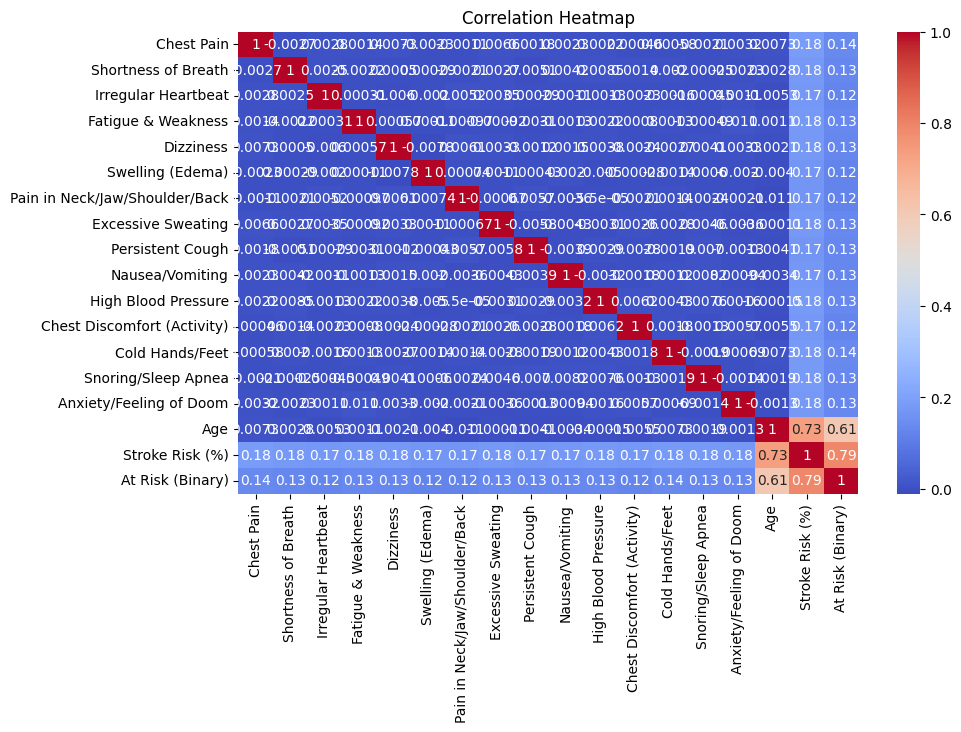

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
df_clean = df.copy()
id_like = ["id","patient_id","record_id"]

for col in df.columns:
    if col.lower().strip() in id_like:
        df_clean = df_clean.drop(col, axis=1)

In [7]:
categorical_cols = df_clean.select_dtypes(include=["object"]).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le

In [8]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.drop("At Risk (Binary)")

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

In [9]:
X = df_clean.drop("At Risk (Binary)", axis=1)
y = df_clean["At Risk (Binary)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    print(f"📌 Model: {name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("-" * 50)

📌 Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[4892    0]
 [   0 9108]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

--------------------------------------------------
📌 Model: KNN
Accuracy: 0.9352142857142857
Confusion Matrix:
 [[4371  521]
 [ 386 8722]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4892
           1       0.94      0.96      0.95      9108

    accuracy                           0.94     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.94      0.93     14000

--------------------------------------------------
📌 Model: SVM
Accura

In [11]:
best_model_name = max(results, key=results.get)
print("\n🔥 Best Model Found:", best_model_name, "with accuracy:", results[best_model_name])


🔥 Best Model Found: Logistic Regression with accuracy: 1.0


In [12]:
import joblib

joblib.dump(best_model, "stroke.pkl")
print("Model saved successfully!")

NameError: name 'best_model' is not defined